In [6]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install scipy

   ---------------------------------------- 0.0/40.9 MB ? eta -:--:--
   --- ------------------------------------ 3.1/40.9 MB 18.5 MB/s eta 0:00:03
   ---- ----------------------------------- 5.0/40.9 MB 15.9 MB/s eta 0:00:03
   ------- -------------------------------- 8.1/40.9 MB 14.0 MB/s eta 0:00:03
   ---------- ----------------------------- 10.7/40.9 MB 13.4 MB/s eta 0:00:03
   ------------ --------------------------- 13.1/40.9 MB 13.3 MB/s eta 0:00:03
   --------------- ------------------------ 15.7/40.9 MB 13.2 MB/s eta 0:00:02
   ----------------- ---------------------- 18.4/40.9 MB 13.0 MB/s eta 0:00:02
   -------------------- ------------------- 21.0/40.9 MB 13.0 MB/s eta 0:00:02
   ----------------------- ---------------- 23.6/40.9 MB 13.0 MB/s eta 0:00:02
   ------------------------ --------------- 25.4/40.9 MB 12.5 MB/s eta 0:00:02
   -------------------------- ------------- 26.7/40.9 MB 11.9 MB/s eta 0:00:02
   --------------------------- ------------ 27.8/40.9 MB 11.3 MB

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog

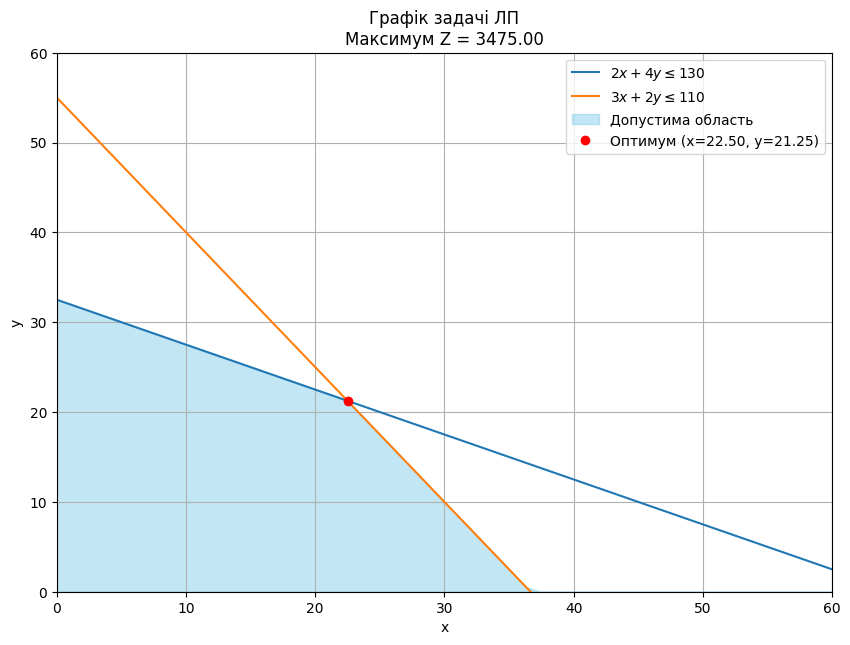

In [33]:

# Створення координатної сітки
x = np.linspace(0, 100, 100)

# Побудова обмежень
y1 = (130 - 2*x) / 4     # з 2x + 4y ≤ 100
y2 = (110 - 3*x) / 2     # з 3x + 2y ≤ 120

# Побудова фону — допустимої області
plt.figure(figsize=(10, 7))
plt.plot(x, y1, label=r'$2x + 4y \leq 130$')
plt.plot(x, y2, label=r'$3x + 2y \leq 110$')
plt.xlim((0, 60))
plt.ylim((0, 60))

# Заповнення допустимої області
y = np.minimum(y1, y2)
y[y < 0] = 0
plt.fill_between(x, 0, y, color='skyblue', alpha=0.5, label="Допустима область")

# Знаходимо оптимальне рішення
res = linprog(c=[-60, -100], A_ub=[[2, 4], [3, 2]], b_ub=[130, 110], bounds=[(0, None), (0, None)], method='highs')

if res.success:
    x_opt, y_opt = res.x
    z_opt = -res.fun
    plt.plot(x_opt, y_opt, 'ro', label=f"Оптимум (x={x_opt:.2f}, y={y_opt:.2f})")
    plt.title(f"Графік задачі ЛП\nМаксимум Z = {z_opt:.2f}")
else:
    plt.title("Оптимальний розв'язок не знайдено")

# Оформлення
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()
